In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from data import get_indicator_data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = get_indicator_data("AAPL")

[*********************100%***********************]  1 of 1 completed
c:\Users\Ethan\Documents\Quantico\data.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.07565670e+09 1.15050328e+09 9.51750116e+08 2.29449817e+09
 1.52437161e+09 3.62646514e+09 1.45549797e+09 8.49901604e+08
 6.28609016e+08 1.25284021e+09 4.32511125e+08 5.97272635e+08
 7.60879148e+08 7.42607083e+08 4.36053658e+08 6.09099273e+08
 1.01171253e+09 7.02115418e+08 4.62354349e+08 5.92204966e+08
 6.19994325e+08 9.43099521e+08 1.24668477e+09 8.94408513e+08
 1.05402151e+09 9.82840566e+08 1.14921864e+09 1.51272346e+09
 1.81156032e+09 1.38443838e+09 1.56694555e+09 1.27223646e+09
 2.30413460e+09 1.79192672e+09 1.40510992e+09 1.57040678e+09
 1.90832533e+09 4.46875703e+09 2.45351313e+09 2.83854037e+09
 1.55030634e+09 6.70667200e+09 1.71653685e+09 1.87863087e+09
 1.30618928e+09 4.26852280e+09 1.29595310e+09 4.45283502e+09
 1.64676806e+09 1.577685

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA18,OBV,MFI,Accum/Dist
Date,,,,,,,,,,,
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,NaN,NaN,7.055552e+08,NaN,3.840613e+08
2005-01-11,1.218750,1.234821,1.145357,1.152857,0.973559,2611627200,NaN,NaN,3.317182e+09,NaN,-1.789691e+09
2005-01-21,1.273393,1.278571,1.250000,1.258750,1.062983,911332800,NaN,NaN,4.228515e+09,NaN,-2.142826e+09
2005-01-26,1.297500,1.299107,1.271786,1.290179,1.089525,739496800,NaN,NaN,4.968012e+09,NaN,-1.886635e+09
2005-01-31,1.331786,1.390893,1.330536,1.373214,1.159645,1681097600,NaN,NaN,6.649110e+09,NaN,-1.190347e+09


In [ ]:
df_copy = df.copy()
# df_copy.fillna(df_copy.mean(), inplace=True)
for column in df_copy.columns:
    if column == "RSI" or column == "OBV":
        continue
    df_copy[column] = np.log(df_copy[column])
    na_vals = df_copy[column].isna().sum()
    print(f"{column} has {na_vals} missing values")

Open has 0 missing values
High has 0 missing values
Low has 0 missing values
Close has 0 missing values
Adj Close has 0 missing values
Volume has 0 missing values
EMA18 has 0 missing values
MFI has 0 missing values
Accum/Dist has 70 missing values


c:\Users\Ethan\Documents\Quantico\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
df_copy

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA18,OBV,MFI,Accum/Dist
Date,,,,,,,,,,,
2005-01-06,0.143945,0.147650,0.123008,0.142089,-0.026951,20.374496,58.717150,3.931746,7.055552e+08,4.039237,19.766313
2005-01-11,0.197826,0.210926,0.135716,0.142243,-0.026797,21.683239,58.717150,3.931746,3.317182e+09,4.039237,NaN
2005-01-21,0.241685,0.245743,0.223144,0.230119,0.061079,20.630419,58.717150,3.931746,4.228515e+09,4.039237,NaN
2005-01-26,0.260439,0.261677,0.240422,0.254781,0.085741,20.421481,58.717150,3.931746,4.968012e+09,4.039237,NaN
2005-01-31,0.286521,0.329946,0.285582,0.317154,0.148114,21.242713,58.717150,3.931746,6.649110e+09,4.039237,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-03,5.416722,5.424113,5.408606,5.419074,5.419074,17.343170,62.109471,5.378622,3.141633e+10,4.110373,22.020566
2024-10-08,5.412984,5.420446,5.408292,5.419517,5.419517,17.276727,62.157039,5.383006,3.144819e+10,3.997640,22.027905
2024-10-18,5.464594,5.464594,5.455364,5.459586,5.459586,17.653489,66.292365,5.391349,3.149462e+10,3.976689,22.026801


In [71]:
df_copy = (df_copy - df_copy.mean())/df_copy.std()
columns = ["Open", "High", "Low", "Close"]
df_copy = df_copy.loc[:, ["RSI", "EMA18", "OBV", "MSI", 'Accum/Dist']]
df_copy.head()


KeyError: "['MSI', 'Accum/Dist'] not in index"

In [43]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_copy)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

In [44]:
df_pca

,PC1,PC2
0,-5.991881,-1.089818
1,-5.541042,-1.102609
2,-5.355568,0.096718
3,-5.302328,-0.152870
4,-5.635605,-0.997974
...,...,...
976,4.583338,0.251369
977,4.605451,0.255683
978,4.550421,0.623949
979,4.488488,0.324547


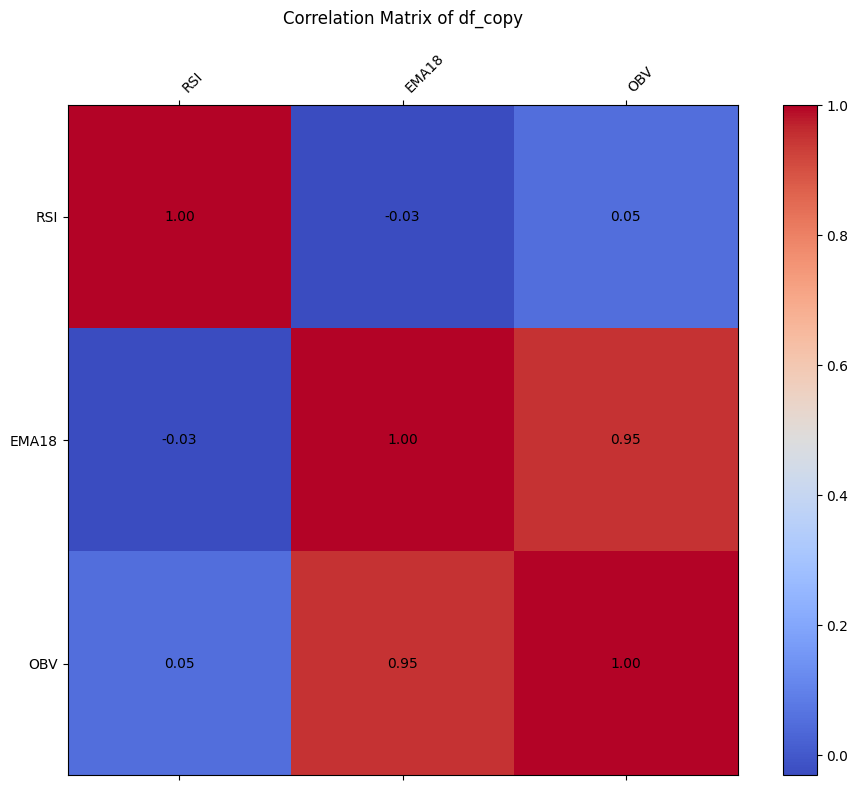

In [65]:
# Compute the correlation matrix
corr_matrix = df_copy.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Display the correlation matrix as an image
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Add color bar
fig.colorbar(cax)

# Set x and y labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left', fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)

# Show values in each cell
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha="center", va="center", color="black")

plt.title("Correlation Matrix of df_copy", pad=20)
plt.tight_layout()
plt.show()

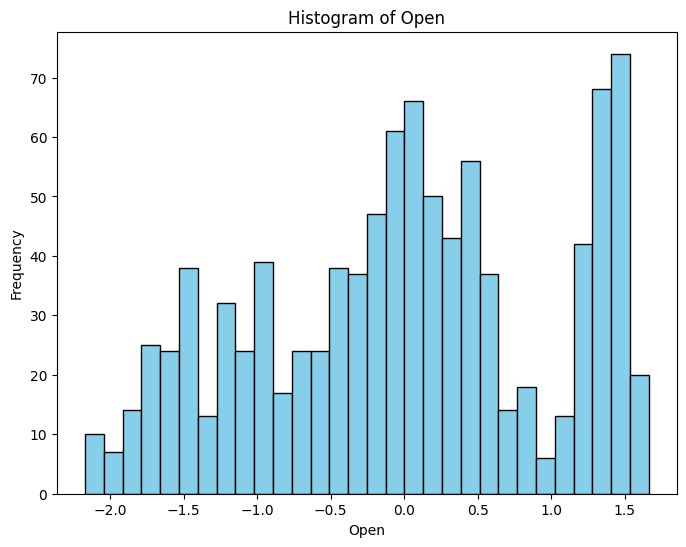

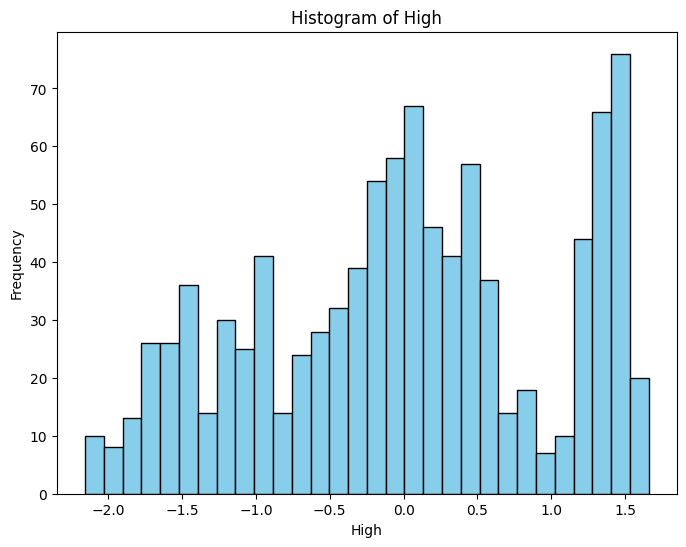

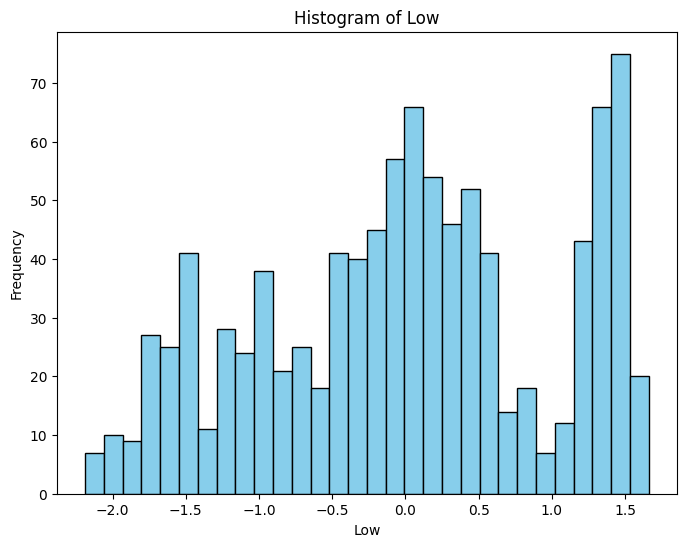

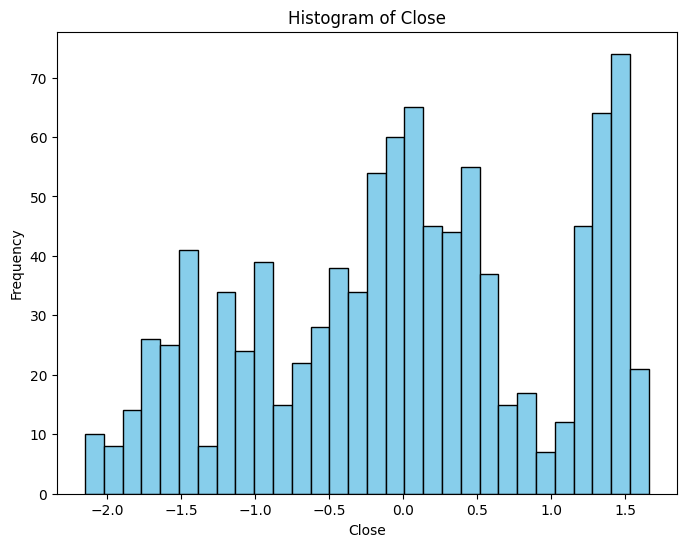

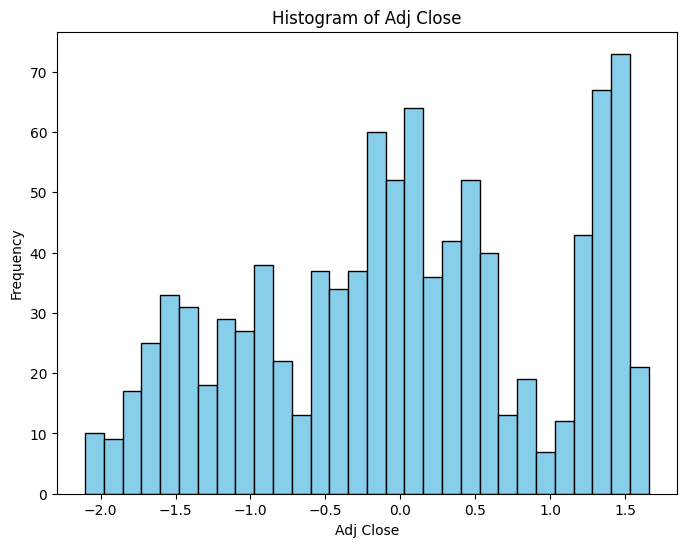

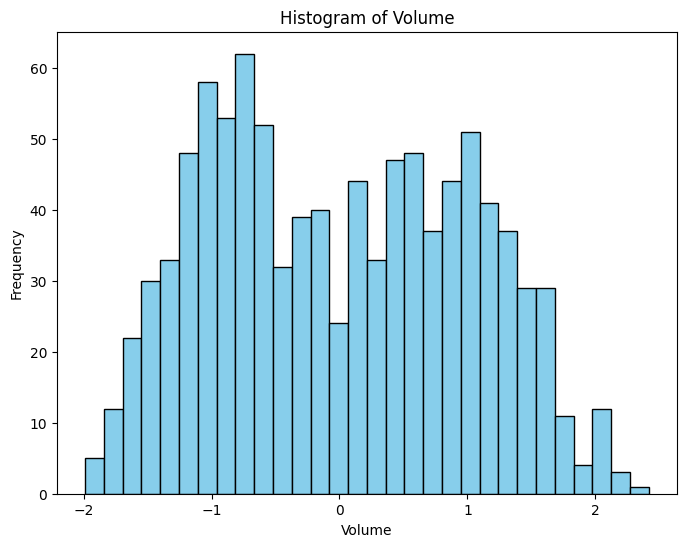

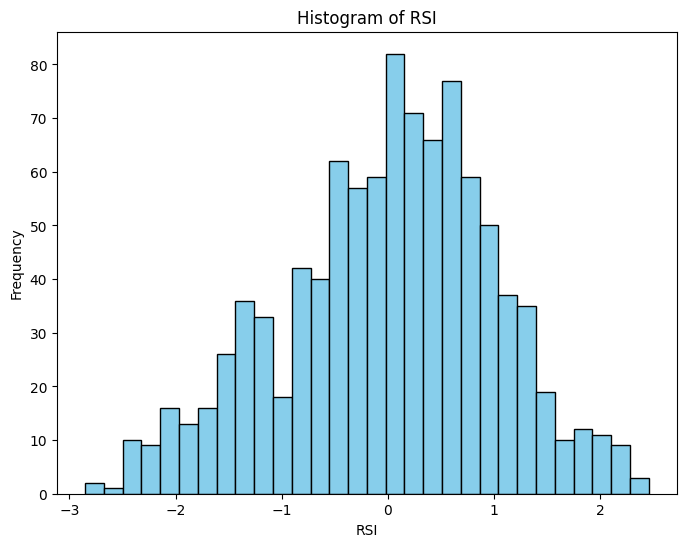

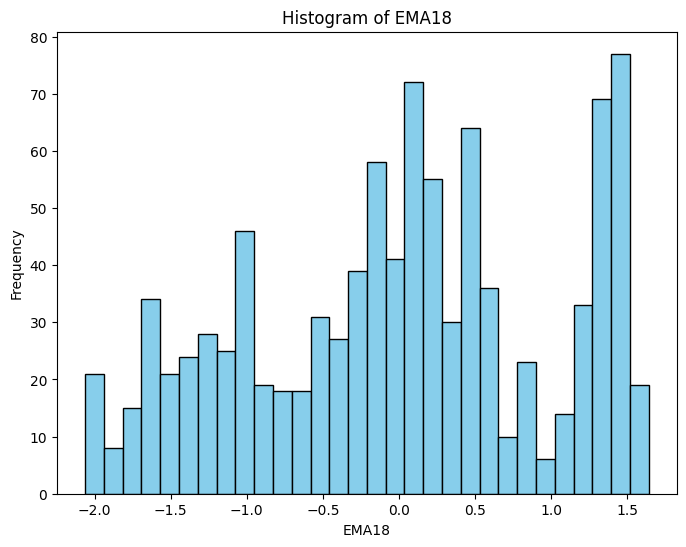

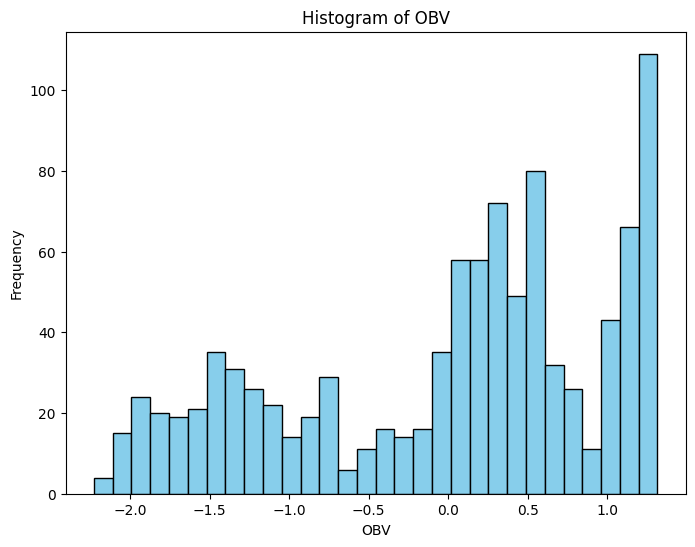

In [58]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_copy[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Selecting our Predictor Variables from the df

In [46]:
X = df_pca.iloc[:,:9]

Making a df where 1 means tomorrows closing price is higher than todays,<br>
-1 means tomorrows closing price is lower than todays

In [47]:
y = np.where(df_copy['Close'].shift(-1) > df_copy['Close'],1,-1)

splitting dataset into training and test data

In [48]:
split = int(0.7*len(df_copy))
training_X, testing_X, training_Y, testing_Y = X[:split], X[split:], y[:split], y[split:]

fitting LR model

In [49]:
model = LogisticRegression()
model = model.fit (training_X, training_Y)
model_summary = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))
print(model_summary)

     0                       1
0  PC1  [0.003922171844615229]
1  PC2   [0.09444703954027274]


In [50]:
start_date = '2024-10-01'
end_date = datetime.today().strftime('%Y-%m-%d') # sets end date to todays date

Create a list containing the start and end dates

In [51]:
prediction_date = [start_date, end_date]

Use the list of dates for prediction

In [52]:
probability = model.predict_proba(testing_X)
print(probability)

[[0.46821115 0.53178885]
 [0.47025527 0.52974473]
 [0.46704287 0.53295713]
 [0.44929704 0.55070296]
 [0.44923338 0.55076662]
 [0.44677381 0.55322619]
 [0.44468296 0.55531704]
 [0.44348676 0.55651324]
 [0.43438693 0.56561307]
 [0.43146355 0.56853645]
 [0.42773196 0.57226804]
 [0.42225369 0.57774631]
 [0.41776533 0.58223467]
 [0.41429703 0.58570297]
 [0.41108059 0.58891941]
 [0.4073928  0.5926072 ]
 [0.42057641 0.57942359]
 [0.4413688  0.5586312 ]
 [0.44728182 0.55271818]
 [0.44859651 0.55140349]
 [0.43582235 0.56417765]
 [0.4317161  0.5682839 ]
 [0.43199197 0.56800803]
 [0.42639088 0.57360912]
 [0.42350524 0.57649476]
 [0.42296756 0.57703244]
 [0.42283132 0.57716868]
 [0.41906865 0.58093135]
 [0.41811546 0.58188454]
 [0.43413364 0.56586636]
 [0.4240348  0.5759652 ]
 [0.41821516 0.58178484]
 [0.42634766 0.57365234]
 [0.41997082 0.58002918]
 [0.41704628 0.58295372]
 [0.41628601 0.58371399]
 [0.41301172 0.58698828]
 [0.4104756  0.5895244 ]
 [0.40537979 0.59462021]
 [0.40123776 0.59876224]


Testing model with our testing data

In [53]:
predicted = model.predict(testing_X)

Finding which dates that it predicted to buy<br>
Find the dates with predicted buy signals (Signal = 1)

In [54]:
predicted_labels = 1
buy_signal_dates = prediction_date[predicted_labels == 1]

Print the date(s) with buy signal(s)

In [55]:
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
2024-11-03


Reporting model accuracy

In [56]:
print(metrics.classification_report(testing_Y, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       109
           1       0.63      1.00      0.77       186

    accuracy                           0.63       295
   macro avg       0.32      0.50      0.39       295
weighted avg       0.40      0.63      0.49       295



c:\Users\Ethan\Documents\Quantico\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ethan\Documents\Quantico\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ethan\Documents\Quantico\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu